<a href="https://colab.research.google.com/github/Noor820/oibsib_03/blob/main/oibsib3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv('Advertising.csv')

In [10]:
print("Names of columns in advertising sales prediction dataset are: \n\n",data.columns)

Names of columns in advertising sales prediction dataset are: 

 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [11]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
print("Random 5 Rows: \n")
data.sample(5)

Random 5 Rows: 



,TV,Radio,Newspaper,Sales
178,276.7,2.3,23.7,11.8
175,276.9,48.9,41.8,27.0
13,97.5,7.6,7.2,9.7
39,228.0,37.7,32.0,21.5
134,36.9,38.6,65.6,10.8


In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


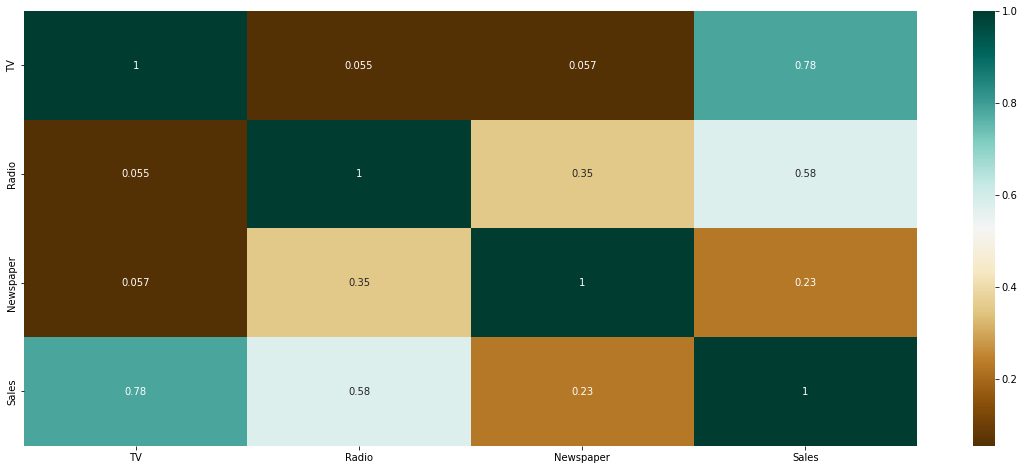

In [21]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), cmap="BrBG", annot = True)
plt.show()

<ipython-input-24-744d7af831aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

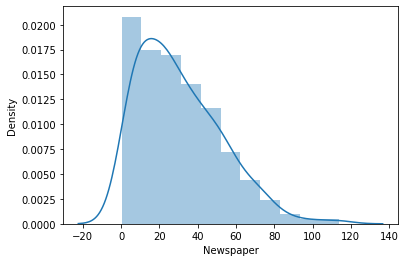

In [24]:
sns.distplot(data['Newspaper'])

<ipython-input-25-cadf8d954391>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TV'])


<Axes: xlabel='TV', ylabel='Density'>

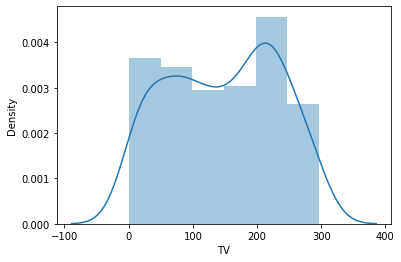

In [25]:
sns.distplot(data['TV'])

<ipython-input-27-2a4c8593908f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Radio'])


<Axes: xlabel='Radio', ylabel='Density'>

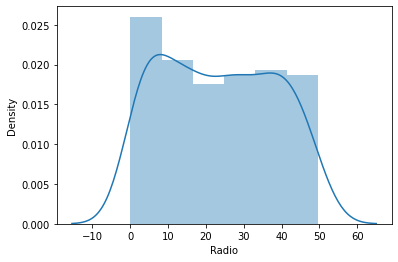

In [27]:
sns.distplot(data['Radio'])

<ipython-input-28-f0d1a083d628>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

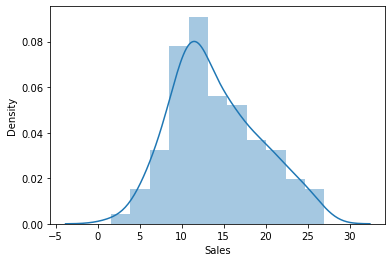

In [28]:
sns.distplot(data['Sales'])

In [30]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="TV", y="Sales", size="TV", trendline="ols")
figure.show()

figure = px.scatter(data_frame = data, x="Newspaper", y="Sales", size="Newspaper", trendline="ols")
figure.show()

figure = px.scatter(data_frame = data, x="Radio", y="Sales", size="Radio", trendline="ols")
figure.show()

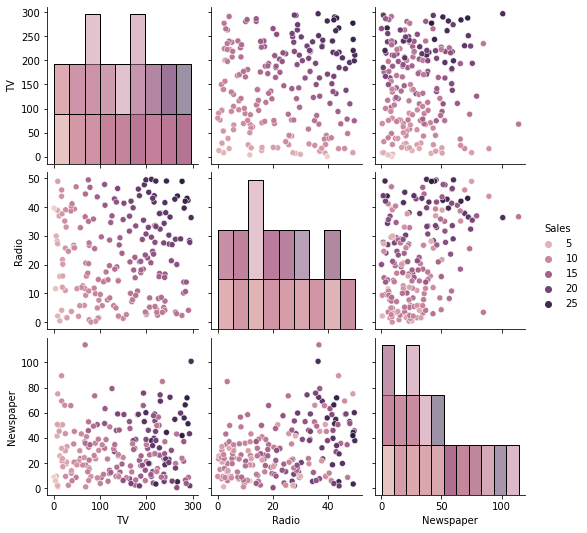

In [42]:
sns.pairplot(data, hue="Sales", diag_kind="hist")

In [43]:
x = np.array(data.drop(['Sales'], axis=1))
y = np.array(data['Sales'])

Xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
print(model.score(xtest, ytest))

0.899438024100912


In [45]:
intercept = model.intercept_
intercept

2.979067338122631

In [46]:
pred = model.predict(xtest)


In [47]:
compare= pd.DataFrame({"ytest":list(ytest), "pred":list(pred)})
compare.head()

,ytest,pred
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373


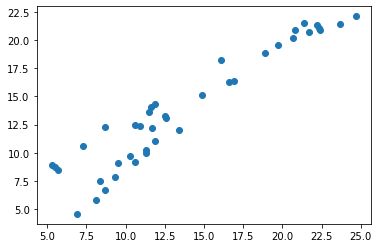

In [48]:
plt.scatter(ytest, pred)

In [49]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(ytest, pred)
print("Mean Absolute error:{}".format(MAE))

MSE = metrics.mean_squared_error(ytest, pred)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(ytest, pred)
print("R2 Score:{}".format(R2))

Mean Absolute error:1.4607567168117601
Mean Squared error: 1.7815996615334502
R2 Score:0.899438024100912
